# Functions and Modeling Applications

Contents:

- [Functions and Modeling Applications](#Functions-and-Modeling-Applications)  
  - [Creating Functions](#Creating-Functions)  
  - [Loops](#Loops)
  - [Linear Algebra](#Linear-Algebra)  
  - [Finite Markov Chains](#Finite-Markov-Chains)   


This lab covers: 

(1) User-defined functions;

(2) Loops;

(3) Linear algebra applications; 

(4) Modeling finite-state Markov chains.

----

## Creating Functions 

In this section we will cover the basics of creating custom functions.

A function is essentially an object that takes a set of inputs, applies some sort of procedure to said inputs, and spits out a result.

Functions can be handy for organizing code that is likely to be routinely re-used in the future with varying inputs.

Let's define a function named `add` that takes two variables, `x` and `y`, as inputs, and returns their sum.

In [65]:
using Pkg # Load `Pkg`, which can be used to install packages
Pkg.add("Plots")


   Resolving package versions...
  No Changes to `C:\Users\leide\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\leide\.julia\environments\v1.11\Manifest.toml`


In [66]:
function add(x, y)
    z = x + y
    return z
end 

add (generic function with 1 method)

To check, we call on `add()` with the inputs `x=2` and `y=3` -- obviously the output is supposed to be 5. 

In [67]:
add(2,3)

5

Success!

Recall that we stored the output into a variable `z` that was defined inside of the function.

If we try to call on `z` in the global environment (outside of the function), we will get an error since `z` only lives within the function:

In [68]:
z=6
add(2,3)

5

Now let's define a function called `all_operations` that takes takes two variables, `x` and `y`, as inputs, and returns their sum, difference, product, and quotient. 

In [69]:
function all_operations(x, y)
    sum = x + y
    difference = x - y
    product = x * y
    quotient = x / y 
    result = (sum, difference, product, quotient) #notice the parenthesis here. It means that the object result will be a tuple
    return result  
end 

all_operations (generic function with 1 method)

To check whether `all_operations` works, we call on it with the inputs `x=1` and `y=2`:

In [70]:
all_operations(1, 2)

(3, -1, 2, 0.5)

**Notice that the output of `all_operations()` is a tuple with four entires.**

Tuples are useful as function output objects because we can easily store their entries as separate variables:

In [71]:
# Store output of `all_operations(1,2)` as separate variables. Here, we are giving names to each element of the tuple created above
(xy_sum, xy_difference, xy_product, xy_quotient) = all_operations(1,2) #You can define the LHS either with or without the parenthesis

# Print all collected variables
@show xy_sum
@show xy_difference
@show xy_product
@show xy_quotient;

xy_sum = 3
xy_difference = -1
xy_product = 2
xy_quotient = 0.5


An alternative simpler way of defining the `all_operations` function by creating an equivalent `all_operations_v2`:

In [72]:
function all_operations_v2(x,y)
    (x + y, x - y, x * y, x / y)
end 

all_operations_v2 (generic function with 1 method)

What did we do differently?
- We defined and stored all operation results in an unassigned tuple ;
- We didn't use `return` at the end of the function to return the output.

**Notice that when we called on the function, Julia noticed the lack of a `return` command and chose the last thing it saw as the output -- in our case this was the unassigned tuple.**

Is this alternative way of defining `all_operations()` better? Not necessarily -- it depends on the context. For example, you might find that shorter code isn't *necessarily* easier to read.

Let's just apply `all_operations()` and `all_operations_v2()` to the same inputs and check whether the outputs match using a custom-defined function `check()`: 

In [73]:
# Create var. `condition` that tests whether outputs are equivalent
condition = all_operations(1,2) == all_operations_v2(1,2)

# Create fun. `check` w/ input `condition`
function check(condition)
    if condition == true 
        result = "The two functions are the same!"
    end 
    if condition != true
        result = "The two functions are not the same!"
    end 
    return result
end 

# Run `check` on `condition`
check(condition)

"The two functions are the same!"

The `check()` function, as defined in the previous cell, is pretty clunky -- let's simplify it by using if-else instead of two if loops:

In [74]:
# Re-define function `check()`, so that instead of two separate if loops, it becomes a single if-else one. 
function check(condition)
    if condition 
        return "The two functions are the same!"
    else 
        return "The two functions are not the same!"
    end 
end

# Call on `check()`
check(condition)

"The two functions are the same!"

Or alternatively:

In [75]:
# Re-define function `check()
function check(condition)
    if condition == true 
        return "The two functions are the same!"
    end 
    "The two functions are not the same!"
end 

# Call on `check()`
check(condition)

"The two functions are the same!"

Again -- in the case of simple functions such as the ones shown above, being super efficient is not necessary. 

**But clunky code can make larger scripts hard to read, and potentially even run slow!**

Now let's talk math.

Defining mathematical functions in Julia is easy.

Let's define the polynomial mapping $f:\mathbb{R} \rightarrow \mathbb{R}$ such that $f(x) = x^2 - 3x + 2$:

In [76]:
f(x) = x^2 - 3x + 2

f (generic function with 1 method)

Suppose we're interested in knowing the value of $f(\pi)$:

In [77]:
f(pi)

2.4448264403199786

Alternatively:

In [78]:
f(π)

2.4448264403199786

There are a lot of details on user-defined functions that we haven't been able to cover here, but I think the above should be enough to get you started. 

Visit the official Julia manual section on [functions](https://docs.julialang.org/en/v1/manual/functions/) to learn more.

---

## *Loops*

Let's print every integer between 1 and 5 using a while loop:

In [79]:
# Initial value
i = 1

# While loop:
while i <= 5 # Run until i = 5
    println(i) # Print i 
    i = i + 1 # Add 1 to i for the next iteration of the loop
end 

1
2
3
4
5


The above can be accomplished more easily using a for loop:

In [80]:
for i in 1:5 
    println(i)
end 

1
2
3
4
5


**We can pass any kind of sequence to a for loop.**

For example, we can print the set of odd numbers between 1 and 5 by defining a sequence called `sequence` and then iterating the values of said sequence:

In [81]:
sequence = [1.0,3.0,5.0]

for i in sequence 
    println(i)
end 

1.0
3.0
5.0


What if we want to instead print the index associated with the entries of `sequence` instead of the entry values themselves?

In [82]:
for i in eachindex(sequence)
    println(i)
end 

1
2
3


Suppose we want to square all values of `sequence` and store it as a separate array called `seq_out`.

We can accomplish this using a for loop that goes through each entry of `sequence`, squares it, and stores it as the corresponding entry of `seq_out`:

In [83]:
# Declare `seq_out` as a vector 
# w/ the same number of entries as `sequence`
seq_out  = zeros(length(sequence))

# Run a for-loop that goes through
# the indexes of `sequence`
for i in eachindex(sequence) 
    seq_out[i] = sequence[i]^2
end 

# Print `seq_out`
seq_out

3-element Vector{Float64}:
  1.0
  9.0
 25.0

Alternatively, we can use a for loop in a **comprehension**:

In [84]:
seq_out = [sequence[i]^2 for i in eachindex(sequence)]

3-element Vector{Float64}:
  1.0
  9.0
 25.0

Even better -- we can **broadcast** (remember this from last lab?) `^2` across `sequence`.

In [85]:
seq_out = sequence.^2

3-element Vector{Float64}:
  1.0
  9.0
 25.0

---

## Linear Algebra

First, we load up the `LinearAlgebra` package.

In [86]:
using LinearAlgebra

Let's assume we have vectors $a_1 = (1, 2, 3)'$ and $a_2 = (4, 5, 6)'$.

We start by defining these two column vectors:

In [87]:
a_1 = [1; 2; 3]
a_2 = [4, 5, 6];

Recall that whether we use `;`'s or `,`'s to separate entries in single-entry arrays, we still get column vectors.

Obviously $a_1$ and $a_2$ do not span each other, but let's just check to be sure:

In [88]:
A = [a_1 a_2]
b = A \ zeros(3)



2-element Vector{Float64}:
 -0.0
 -0.0

Since the zero vector is the only solution for $x$ in $A \, x = b$ where $A = [ a_1 a_2 ]$, then $a_1$ and $a_2$ must be linearly independent.



Find the dot product of $a_1$ and $a_2$:

In [89]:
a_1' * a_2

32

Alternatively:

In [90]:
dot(a_1, a_2)



32

Now let's find $a_1 a_2'$:

In [91]:
a_1 * a_2'

3×3 Matrix{Int64}:
  4   5   6
  8  10  12
 12  15  18

Now let's add the two vectors:

In [92]:
a_1 + a_2 

3-element Vector{Int64}:
 5
 7
 9

Subtract $a_2$ from $a_1$:

In [93]:
a_1 - a_2 

3-element Vector{Int64}:
 -3
 -3
 -3

Let's scale vector $a_1$ by 3:

In [94]:
3a_1 

3-element Vector{Int64}:
 3
 6
 9

Equivalently:

In [95]:
3 * a_1 

3-element Vector{Int64}:
 3
 6
 9

Equivalently:

In [96]:
3 .* a_1

3-element Vector{Int64}:
 3
 6
 9

The norm of vector $a_1$:

In [97]:
norm(a_1)

3.7416573867739413

Since $a_1$ and $a_2$ cannot span $\mathbb{R}^3$, we can find another orthogonal vector $a_3$.

Is $a_3 = a_1 + a_2$ orthogonal? (Obviously not, by definition, but let's practice checking)

In [98]:
a_3 = a_1 + a_2
b = A \ a_3 

2-element Vector{Float64}:
 0.9999999999999979
 1.000000000000001

Since there exists a non-trivial solution to $x$ in $[a_1 \, a_2] \, x = A \, x = a_3$, then $a_3$ is not linearly independent. 

We can find a linearly independent $a_3$ by guessing some initial vector $b_3$, projecting it onto the columns of $A$ to obtain the projection $\hat{b}_3$, and then extracting the orthogonal $a_3 = b_3 - \hat{b}_3$:

In [99]:
b_3 = [2, 3, 4]
a_3 = b_3 - (A * inv(A'A) * A' * b_3)
a_3

3-element Vector{Float64}:
 0.0
 1.7763568394002505e-15
 3.552713678800501e-15

Now let's check whether $a_3$ is actually linearly independent by redefining $A$ as $A = [a_1 \, a_2 \, a_3]$ and solving for $x$ in $A \, x = 0$:

In [114]:

# Check if the matrix A is full rank
rank_A = rank(A)
if rank_A < size(A, 2)
    println("Matrix A is not full rank. Columns are linearly dependent.")
else
    println("Matrix A is full rank. Columns are linearly independent.")
end

Matrix A is not full rank. Columns are linearly dependent.


Since the only solution for $x$ in $A \, x = 0$ is the trivial solution, then $A$ must be full-rank.

Now let's check the eigenvalues and eigenvectors of $A$:

In [37]:
eigenv_A, eigenvec_A =eigen(A);

In [103]:
eigenv_A

3-element Vector{Float64}:
 -0.4641016151377525
 -3.72818950727888e-30
  6.464101615137754

In [104]:
eigenvec_A

3×3 Matrix{Float64}:
 -0.491831  -2.36848e-15  -0.412884
  0.180023   5.92119e-16  -0.56401
  0.851877   1.0          -0.715136

---

## Finite Markov Chains

Suppose that for a Markov process with three states we are given an initial state distribution and a stochastic matrix. 

We are told to compute the state density in 10 periods (at $t=10$).

The given initial distribution is $P_0 = (1/3, 1/3, 1/3)'$, while the stochastic matrix is 

$$M = \begin{bmatrix} 0.95 & 0.05 & 0 \\ 0.15 & 0.75 & 0.1 \\ 0 & 0.5 & 0.5 \end{bmatrix} \, .$$ 

In [106]:
# Define initial state distr.
P0 = [1/3, 1/3, 1/3]

# Define stochastic matrix
M = [0.95 0.05 0 ; 0.15 0.75 0.1 ; 0.0 0.5 0.5]

# Compute state distr. at t = 10
P10 = (P0' * M^(10))'

3-element Vector{Float64}:
 0.6415045988833332
 0.2941181890520833
 0.06437721206458331

More generally, what if we're interested in computing the state density for a variety of $n \in \mathbb{N}$ periods? 

This is when writing custom functions comes in handy!

Let's create a function named `markov_chain` with inputs for $P_0$, $M$, and $n$:

In [107]:
function markov_chain(P0, M, n)
    
    # Start by creating a copy of P0
    # to later feed into the loop
    P = copy(P0) 
    
    # Run a loop that computes
    # P n-steps ahead
    for i in 1:n 
        new_P = (P' * M)'
        P = new_P
        
    end 
    
    # Return the final state distr.
    return P

end     

markov_chain (generic function with 1 method)

We can now try our new function out using the previously-defined `P0` and `M` with `n` set to 10:

In [108]:
markov_chain(P0, M, 10)

3-element Vector{Float64}:
 0.641504598883333
 0.29411818905208326
 0.06437721206458331

Does this match `P10`?

In [109]:
markov_chain(P0, M, 10) ≈ P10

true

It does!

We can now use this function to do a whole bunch of useful things.

For example, given the same $P_0$ and $M$, we can now create a list of $P_n$ for $n = 1,2,\ldots,20$:

In [110]:
probabilities = [markov_chain(P0, M, n) for n in 1:20];

We may visualize the probability of each state across time by gathering and plotting the corresponding series for all three states:

In [111]:
state1 = zeros(20)
state2 = zeros(20)
state3 = zeros(20)

for i in 1:20
    state1[i] = probabilities[i][1]
    state2[i] = probabilities[i][2]
    state3[i] = probabilities[i][3]
end 

Let's load the `Plots` package to make a couple of plots.

In [112]:
using Plots

First, let's make a simple plot that contains all series:

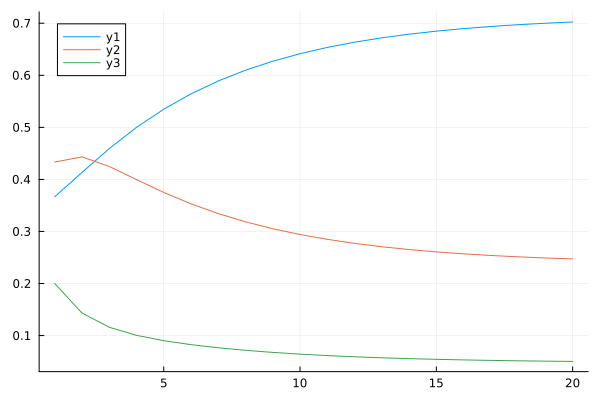

In [50]:
time = 1:20
plot(time, state1) # Plot state 1 density
plot!(time, state2) # Plot state 2 density
plot!(time, state3) # Plot state 3 density

Notice that with time, being in state 1 becomes more likely, while states 2 and 3 becomes less likely.

We may also create a separate plot for each series, but include them in a single composition:

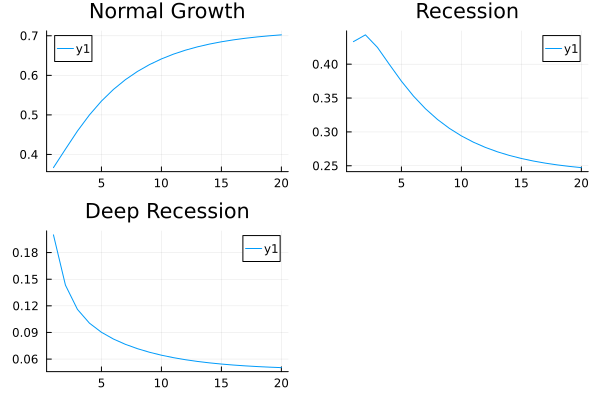

In [51]:
p1 = plot(time, state1, title = "Normal Growth") # Plot state 1 probability
p2 = plot(time, state2, title = "Recession") # Plot state 2 probability
p3 = plot(time, state3, title = "Deep Recession") # Plot state 3 probability
plot(p1, p2, p3)

Now let's write a function that computes the probability of a given sequence of outcomes.

(You should have seen something like this on Assignment 1.)

In [52]:
function outcome_prob(outcome, P0, M)

# Make sure `outcome` contains integers
# to allow for indexing 
outcome = floor.(Int64, outcome) 

# Store probability of initial state 
probability = P0[outcome[1]]

# Compute probability of `outcome` sequence
for i in 2:length(outcome)
    probability = probability * M[outcome[i-1], outcome[i]]
    end 
    
    # Return `probability` -- prob. of sequence `outcome`
    return probability
end 

outcome_prob (generic function with 1 method)

Let's keep using our previously-defined initial distribution $P_0$ and stochastic matrix $M$.

We can now feed the function the following sequence of states to check its functionality: $11$ -- the probability of this sequence of outcomes should obviously be (1/3)(19/20) according to our defined $P_0$ and $M$.

In [53]:
outcome_prob(ones(2), P0, M)

0.31666666666666665

What if we want to find out the probability of having one of the following outcomes: (1) $11$, and (2) $22$ ?

We can use `outcome_prob()` to compute the probability of each outcome, and then find their sum.

In [75]:
outcome_prob([1,1], P0, M) + outcome_prob([2,2], P0, M)

0.5666666666666667

---